<a href="https://colab.research.google.com/github/iqbalamo93/Autoencoder/blob/master/Images_Kr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.datasets import mnist

In [8]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


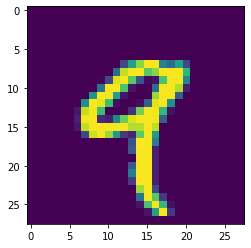

In [9]:
plt.imshow(X_train[4])

In [10]:
X_train = X_train/255
X_test  = X_test/255

In [11]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [12]:
from tensorflow.keras.optimizers import SGD

In [13]:
X_train[1].shape

(28, 28)

In [32]:
X_train.shape

(60000, 28, 28)

In [14]:
y_train[4]

9

In [36]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [37]:
decoder  = Sequential()
decoder.add(Dense(50,input_shape=[25], activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid'))
decoder.add(Reshape([28,28]))

In [38]:
autoencoder = Sequential([encoder, decoder])

In [39]:
autoencoder.compile(loss='binary_crossentropy',
                  optimizer=SGD(1.5),
                  metrics=['accuracy'])

In [41]:
autoencoder.fit(X_train, X_train,epochs=5,validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2022 - accuracy: 0.1403 - val_loss: 0.1753 - val_accuracy: 0.1654
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1660 - accuracy: 0.1870 - val_loss: 0.1592 - val_accuracy: 0.1973
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1540 - accuracy: 0.2023 - val_loss: 0.1451 - val_accuracy: 0.2090
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1454 - accuracy: 0.2129 - val_loss: 0.1430 - val_accuracy: 0.2164
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1401 - accuracy: 0.2210 - val_loss: 0.1369 - val_accuracy: 0.2223


In [44]:
passed_images = autoencoder.predict(X_test[:10])

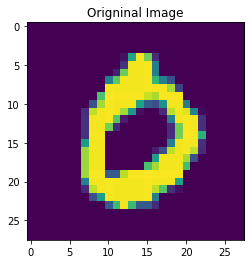

Text(0.5, 1.0, 'Reproduced Image')

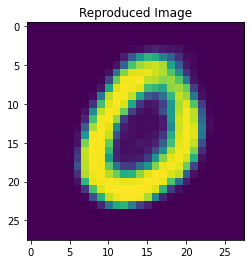

In [49]:
n = 3
plt.imshow(X_test[n])
plt.title('Origninal Image')
plt.show()
plt.imshow(passed_images[n])
plt.title('Reproduced Image')